# Ejemplo: Aplicacion de un Algoritmo Genético (AG) básico#



In [481]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt

In [482]:
# Definiendo los hipérparametros
DNA_SIZE = 30            # longitud del ADN (cromosoma)
POP_SIZE = 50            # tamaño de la población inicial (Población constante durante las iteraciones)
CROSS_RATE = 0.8         # Probabilidad de apareamiento (Cruce de ADN)
MUTATION_RATE = 0.1      # Probabilidad de mutación
N_GENERATIONS = 1000       # Generaciones (Iteraciones)
X_BOUND = [0, 50]         # Valor mínimo y máximo de X

In [483]:
# Función a optimizar (objetivo hallar el máximo global)
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))
print([x[np.argmax(F(x))], np.amax(F(x))])


[47.23618090452261, 88.62698535402964]


Algoritmo Genético básico

In [484]:
# Aptitud diferente de cero para la selección
def get_fitness(pred): return pred + 1e-3 - np.min(pred) # pred = F(translateDNA(pop))

# Convertir el ADN binario a decimal y normalizarlo en el rango [0, 50]
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# Selección de la población (selección natural del más apto)
def select(pop, fitness):
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

# proceso de apareamiento (Cruzamiento de genes)
def crossover(parent, pop):
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # seleccion de otro individuo de la poblacion
        cross_points = np.random.randint(0, 1, size=DNA_SIZE).astype(np.bool_)   # Seleccion de los puntos de cruzamiento
        parent[cross_points] = pop[i_, cross_points]                            # Apareamiento (Produccion de un hijo)
    return parent

# proceso de mutación
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [485]:
2 ** np.arange(DNA_SIZE-1)[::-1]

array([268435456, 134217728,  67108864,  33554432,  16777216,   8388608,
         4194304,   2097152,   1048576,    524288,    262144,    131072,
           65536,     32768,     16384,      8192,      4096,      2048,
            1024,       512,       256,       128,        64,        32,
              16,         8,         4,         2,         1])

In [486]:
t = np.array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [487]:
# x -> numeric value -> escalate to function domain range
translateDNA(t)

49.05849448317522

In [488]:
mutate(t)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0])

Evaluacion y aplicacion del AG en el problema

In [489]:
# Generando la poblacion inicial
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
print(pop)
print(translateDNA(pop))

[[1 1 1 ... 1 0 0]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 1]
 [0 1 0 ... 0 0 0]]
[49.00276684 10.40506648  0.28163898 36.56011688 38.26658743 29.98301059
  7.21114698 49.77417854 35.08336254 27.10864733 37.29797153 39.09671049
 20.12305881 42.71934465 35.75523932 31.96079133 33.12879646  6.10506558
 22.91772605 12.34776691 30.9053452  20.6633005  13.74585956 24.37809657
 11.33114636 13.78464155  1.5869156  16.24503137  6.0268119  11.03243349
 27.96814095 25.93810407 35.44788341  8.29393012 48.02997852 49.89603781
  4.43052249 35.1379155  48.87427902 33.46354434  1.55790439 43.31658314
 45.87625023 12.08579271 18.80773475 30.40861779 44.53242057 31.65377111
 33.11087786 17.22697654]


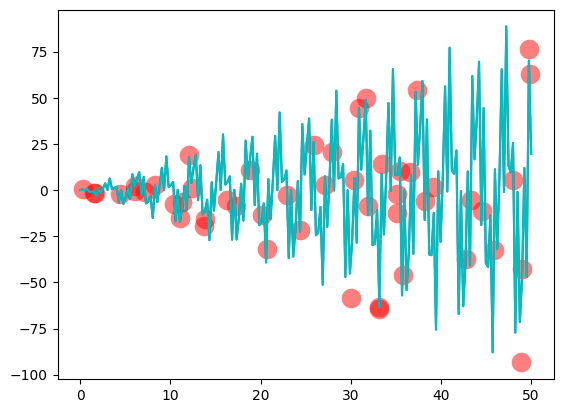

(Generation 0) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0]
(Generation 1) Most fitted DNA:  [1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0]
(Generation 2) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0]
(Generation 3) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0]
(Generation 4) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0]
(Generation 5) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0]
(Generation 6) Most fitted DNA:  [1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1]
(Generation 7) Most fitted DNA:  [1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0]
(Generation 8) Most fitted DNA:  [1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1]
(Generation 9) Most fitted DNA:  [1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1]
(Generation 10) Most fitted DNA:  [1 1 1 0 1 1 1 0

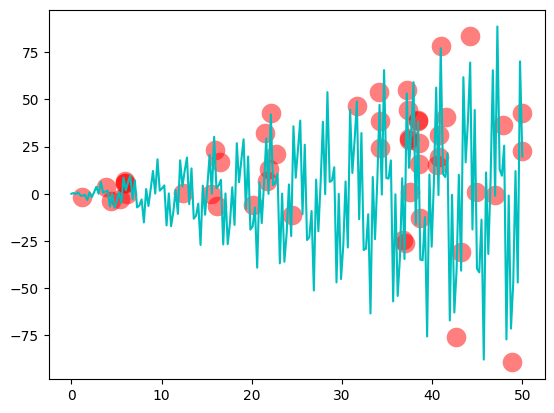

(Generation 100) Most fitted DNA:  [1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0]
(Generation 101) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1]
(Generation 102) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0]
(Generation 103) Most fitted DNA:  [1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
(Generation 104) Most fitted DNA:  [1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1]
(Generation 105) Most fitted DNA:  [1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1]
(Generation 106) Most fitted DNA:  [1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1]
(Generation 107) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1]
(Generation 108) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1]
(Generation 109) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1]
(Generation 110) Most fitted D

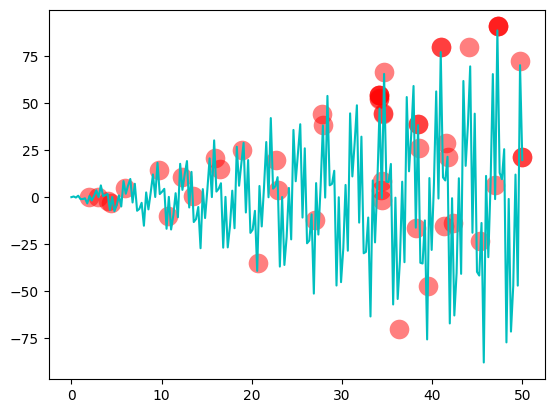

(Generation 200) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1]
(Generation 201) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0]
(Generation 202) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1]
(Generation 203) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0]
(Generation 204) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1]
(Generation 205) Most fitted DNA:  [1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0]
(Generation 206) Most fitted DNA:  [1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1]
(Generation 207) Most fitted DNA:  [1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1]
(Generation 208) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0]
(Generation 209) Most fitted DNA:  [1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0]
(Generation 210) Most fitted D

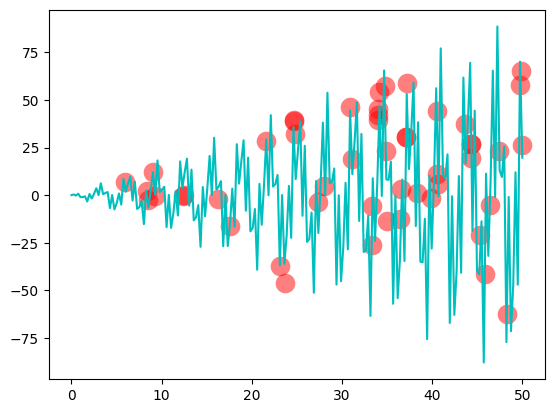

(Generation 300) Most fitted DNA:  [1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1]
(Generation 301) Most fitted DNA:  [1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0]
(Generation 302) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0]
(Generation 303) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0]
(Generation 304) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1]
(Generation 305) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1]
(Generation 306) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1]
(Generation 307) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1]
(Generation 308) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1]
(Generation 309) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1]
(Generation 310) Most fitted D

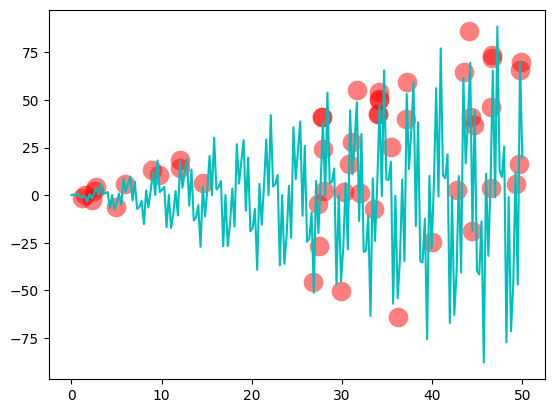

(Generation 400) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0]
(Generation 401) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0]
(Generation 402) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0]
(Generation 403) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0]
(Generation 404) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0]
(Generation 405) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1]
(Generation 406) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0]
(Generation 407) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0]
(Generation 408) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1]
(Generation 409) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1]
(Generation 410) Most fitted D

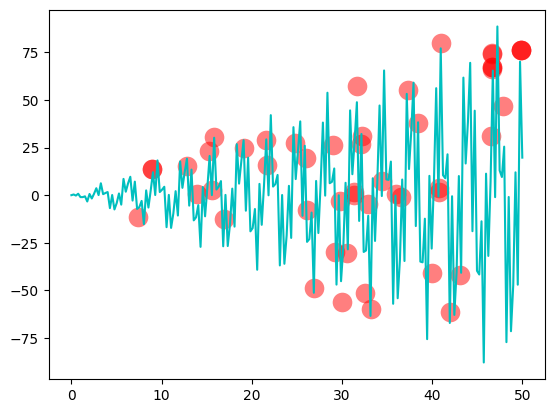

(Generation 500) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1]
(Generation 501) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
(Generation 502) Most fitted DNA:  [1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
(Generation 503) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1]
(Generation 504) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1]
(Generation 505) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1]
(Generation 506) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1]
(Generation 507) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1]
(Generation 508) Most fitted DNA:  [1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
(Generation 509) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0]
(Generation 510) Most fitted D

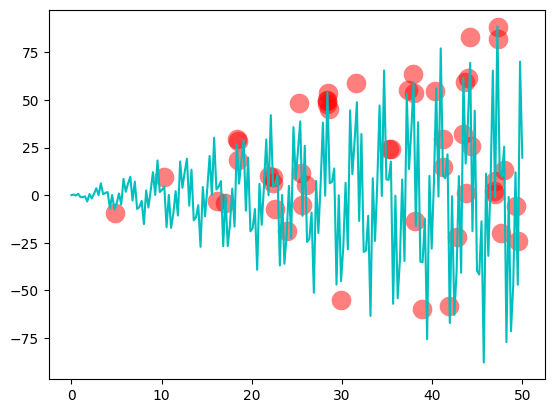

(Generation 600) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0]
(Generation 601) Most fitted DNA:  [1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0]
(Generation 602) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1]
(Generation 603) Most fitted DNA:  [1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1]
(Generation 604) Most fitted DNA:  [1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1]
(Generation 605) Most fitted DNA:  [1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1]
(Generation 606) Most fitted DNA:  [1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0]
(Generation 607) Most fitted DNA:  [1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0]
(Generation 608) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0]
(Generation 609) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0]
(Generation 610) Most fitted D

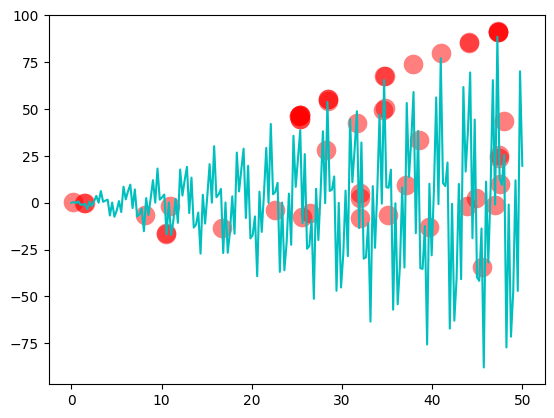

(Generation 700) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1]
(Generation 701) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1]
(Generation 702) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1]
(Generation 703) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0]
(Generation 704) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1]
(Generation 705) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0]
(Generation 706) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0]
(Generation 707) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0]
(Generation 708) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0]
(Generation 709) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0]
(Generation 710) Most fitted D

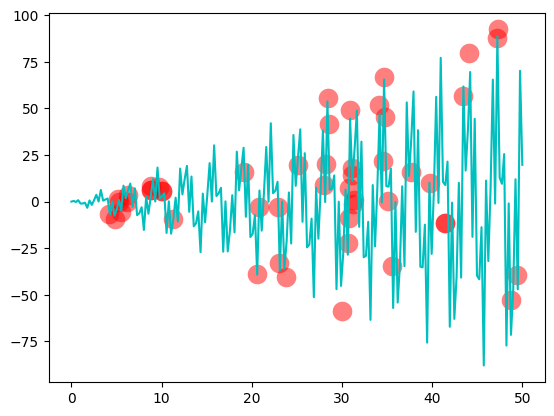

(Generation 800) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
(Generation 801) Most fitted DNA:  [1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1]
(Generation 802) Most fitted DNA:  [1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1]
(Generation 803) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1]
(Generation 804) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1]
(Generation 805) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0]
(Generation 806) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1]
(Generation 807) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1]
(Generation 808) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1]
(Generation 809) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1]
(Generation 810) Most fitted D

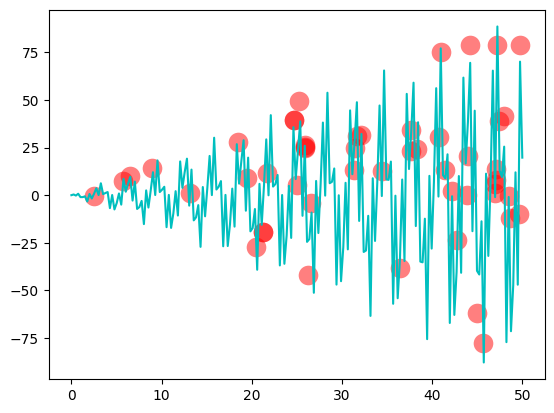

(Generation 900) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0]
(Generation 901) Most fitted DNA:  [1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0]
(Generation 902) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1]
(Generation 903) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0]
(Generation 904) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0]
(Generation 905) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1]
(Generation 906) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1]
(Generation 907) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1]
(Generation 908) Most fitted DNA:  [1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1]
(Generation 909) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
(Generation 910) Most fitted D

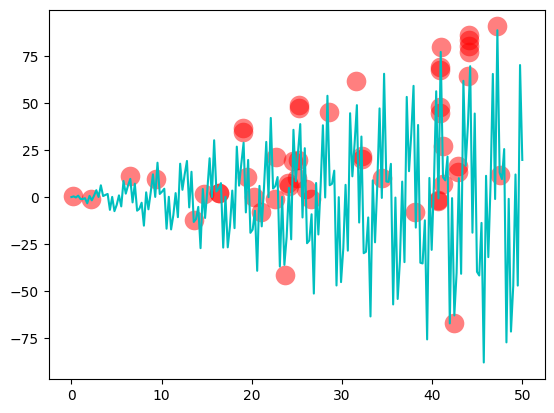

(Generation 999) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [490]:
PLOT_EVERY_GENERATIONS=100

for i in range(N_GENERATIONS):
    #import pdb; pdb.set_trace()
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA

    if i % PLOT_EVERY_GENERATIONS == 0 or i == N_GENERATIONS-1: # plot every PLOT_EVERY_GENERATIONS generations
        # Plotear
        plt.plot(x, F(x), color='c')
        if 'sca' in globals(): sca.remove()
        sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # Evolucion del AG
    fitness = get_fitness(F_values)
    print(f"(Generation {i}) Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # Reemplazando al padre por el hijo

plt.ioff(); plt.show()

# Tarea - PC 2

`objective function`: https://www.sfu.ca/~ssurjano/ackley.html

### Resources
* [Lecture 18 (Evolutionary Algorithms) - Video](https://www.youtube.com/watch?v=3-NiZPbkr7A)
* [lecture-13-learning-genetic-algorithms](https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-13-learning-genetic-algorithms/)
* [An Introduction to Genetic Algorithms](https://direct.mit.edu/books/book/4675/An-Introduction-to-Genetic-Algorithms)
* [Introduction to optimization with Genetic Algorithm](https://towardsdatascience.com/introduction-to-optimization-with-genetic-algorithm-2f5001d9964b)

In [491]:
# Definiendo los hipérparametros
DNA_SIZE = 30            # longitud del ADN (cromosoma)
POP_SIZE = 20            # tamaño de la población inicial (Población constante durante las iteraciones)
CROSS_RATE = 0.8         # Probabilidad de apareamiento (Cruce de ADN)
MUTATION_RATE = 0.1      # Probabilidad de mutación
N_GENERATIONS = 50       # Generaciones (Iteraciones)

### Defining Ackley Function
`source`: https://www.sfu.ca/~ssurjano/ackley.html

In [492]:
# Función a optimizar (objetivo hallar el máximo global)

a = 20
b = 0.2
c = 2*np.pi
d = 2
X_BOUND = [-32.768, 32.768]         # Valor mínimo y máximo de X

F = lambda X, Y: -a*np.exp(-b*np.sqrt((X**2 + Y**2)/d)) - np.exp((np.cos(c*X) + np.cos(c*Y))/d) + a + np.exp(1)

### Plotting Ackley function

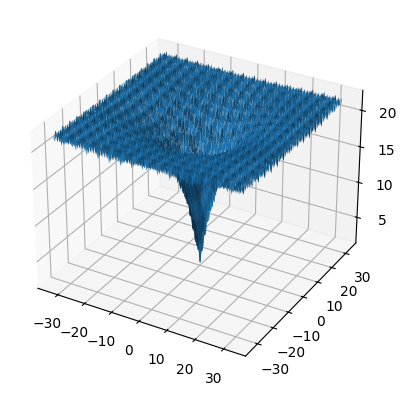

In [493]:
def plot_ackley(ax = None):
    if ax is None:
        ax = plt.figure().add_subplot(projection='3d')
    
    t = np.linspace(*X_BOUND, 200)
    
    X, Y = np.meshgrid(t, t)
    Z = F(X, Y)
    
    ax.plot_surface(X, Y, Z)
    return ax

plot_ackley()
plt.show()

In [494]:
# Generando la poblacion inicial
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE, d))
print(f"pop.shape: {pop.shape}")

pop.shape: (20, 30, 2)


In [495]:
# selecting a chromosome
s = pop[0, :]
print(s.shape)
s.T

(30, 2)


array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0]])

### Defining functions (fitness, translateDNA, crossover, select, mutate)

In [496]:
# Aptitud diferente de cero para la selección
def get_fitness(pred): # pred = F(x, y)
    # I want (x, y) that F(x, y) are close to 0, so if t = F(x, y) is a value close to 0, then 1/t is big
    # to avoid overflow (1/0) we are going to add 1e-3 to t
    return 1/(pred + 1e-3) 

# Convertir el ADN binario a decimal y normalizarlo en el rango [X_BOUND[0], X_BOUND[1]]
def translateDNA(pop, dna_size: int = DNA_SIZE):
    """
    pop: population
    """
    #import pdb; pdb.set_trace()
    x = pop[:, :, 0].dot(2 ** np.arange(dna_size)[::-1]) / float(2**dna_size-1) # range [0, 1]
    y = pop[:, :, 1].dot(2 ** np.arange(dna_size)[::-1]) / float(2**dna_size-1)

    x = x*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    
    return x, y
    

# Selección de la población (selección natural del más apto)
def select(pop, fitness, pop_size: int = POP_SIZE):
    idx = np.random.choice(np.arange(pop_size), size=pop_size, replace=True,
                           p=fitness/fitness.sum())

    
    return pop[idx]

# proceso de apareamiento (Cruzamiento de genes)
def crossover(parent, pop, *, pop_size: int = POP_SIZE, dna_size: int = DNA_SIZE, verbose: bool = False):
    if np.random.rand() < CROSS_RATE:
        #import pdb; pdb.set_trace()
        i_ = np.random.randint(0, pop_size, size=1)                             # seleccion de otro individuo de la poblacion
        cross_points = np.random.randint(0, 1, size=(dna_size, d)).astype(np.bool_)   # Seleccion de los puntos de cruzamiento
        if verbose:
            print(f"=== cross_points === \n{cross_points}")
            print(f"\n===couple === \nparent:\n{parent} \n\npair:\n{pop[i_]}")
        parent[cross_points] = pop[i_, cross_points]                            # Apareamiento (Produccion de un hijo)
    return parent

# proceso de mutación
def mutate(child, *, dna_size: int = DNA_SIZE, verbose: bool = False):
    for point in np.ndindex(dna_size, d):
        if np.random.rand() < MUTATION_RATE:
            if verbose:
                print(f"Mutated index: {point}")
            child[point] = 1 if child[point] == 0 else 0
    return child

### Select Process (EXAMPLE)

In [497]:
POP_SIZE_TEST = 3 # poblacion
DNA_SIZE_TEST = 4 # DNA_SIZE
pop_test = np.random.randint(2, size=(POP_SIZE_TEST, DNA_SIZE_TEST, d))
print(pop_test.shape)
pop_test

(3, 4, 2)


array([[[0, 0],
        [1, 1],
        [0, 0],
        [0, 0]],

       [[0, 1],
        [1, 0],
        [1, 1],
        [1, 1]],

       [[0, 0],
        [1, 0],
        [1, 1],
        [0, 0]]])

In [498]:
x = pop_test[0, :, 0] # chromosome 0 - dimension 1
x

array([0, 1, 0, 0])

In [499]:
y = pop_test[0, :, 1] # chromosome 0 - dimension 2
y

array([0, 1, 0, 0])

In [500]:
## translate DNA of chromosome 0
x = x.dot(2 ** np.arange(DNA_SIZE_TEST)[::-1]) / float(2**DNA_SIZE_TEST-1)
x = x*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
x

-15.291733333333333

In [501]:
## translate DNA of chromosome 0
y = y.dot(2 ** np.arange(DNA_SIZE_TEST)[::-1]) / float(2**DNA_SIZE_TEST-1)
y = y*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
y

-15.291733333333333

In [502]:
X, Y = translateDNA(pop_test, dna_size=DNA_SIZE_TEST)
X, Y # X[0], Y[0]

(array([-15.29173333,  -2.18453333,  -6.5536    ]),
 array([-15.29173333,  15.29173333, -24.02986667]))

In [503]:
F_values = F(X, Y)    # compute function value by extracting DNA
F_values

array([21.00732578, 19.39483987, 21.1082466 ])

In [504]:
fitness = get_fitness(F_values)
fitness

array([0.04760018, 0.05155745, 0.0473726 ])

In [505]:
# select function
idx = np.random.choice(np.arange(POP_SIZE_TEST), size=POP_SIZE_TEST, replace=True,
                           p=fitness/fitness.sum())

idx

array([0, 1, 2])

In [506]:
# best individual selected based on fitness values
best = pop_test[idx]
best

array([[[0, 0],
        [1, 1],
        [0, 0],
        [0, 0]],

       [[0, 1],
        [1, 0],
        [1, 1],
        [1, 1]],

       [[0, 0],
        [1, 0],
        [1, 1],
        [0, 0]]])

In [507]:
## crossover
crossover(best[0], pop_test, dna_size=DNA_SIZE_TEST, pop_size=POP_SIZE_TEST, verbose=True)

=== cross_points === 
[[False False]
 [False False]
 [False False]
 [False False]]

===couple === 
parent:
[[0 0]
 [1 1]
 [0 0]
 [0 0]] 

pair:
[[[0 1]
  [1 0]
  [1 1]
  [1 1]]]


array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0]])

In [508]:
## mutate
mutate(best[0], dna_size=DNA_SIZE_TEST, verbose=True)

Mutated index: (1, 0)
Mutated index: (3, 1)


array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 1]])

### MAIN

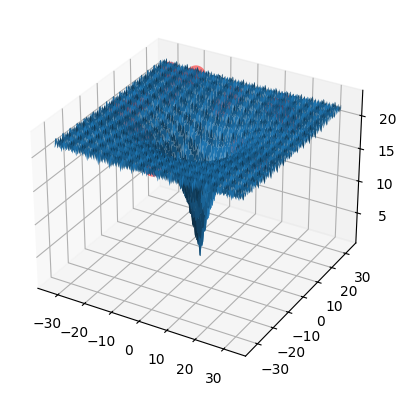

(Generation 0) Most fitted DNA:  [[1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1]
 [0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0]]
(Generation 1) Most fitted DNA:  [[1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1]
 [0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0]]
(Generation 2) Most fitted DNA:  [[1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1]]
(Generation 3) Most fitted DNA:  [[1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0]
 [0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0]]
(Generation 4) Most fitted DNA:  [[0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0]]
(Generation 5) Most fitted DNA:  [[0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0]]
(Generation 6) Most fitted DNA:  [[0 1 1

In [512]:
PLOT_EVERY_GENERATIONS=1

ax = plt.figure().add_subplot(projection='3d')
sca = None

for i in range(N_GENERATIONS):
    X, Y = translateDNA(pop)
    F_values = F(X, Y)    # compute function value by extracting DNA

    if i % PLOT_EVERY_GENERATIONS == 0 or i == N_GENERATIONS-1: # plot every PLOT_EVERY_GENERATIONS generations
        # Plotear
        #import pdb; pdb.set_trace()
        plot_ackley(ax)
        if sca: sca.remove()
        #sca = ax.scatter(X, Y, F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.1) # 0.05
        sca = ax.scatter(X, Y, F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05) # 0.05
        #plt.show()

    # Evolucion del AG
    fitness = get_fitness(F_values)
    print(f"(Generation {i}) Most fitted DNA: ", pop[np.argmax(fitness), :].T)
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # Reemplazando al padre por el hijo

plt.ioff(); plt.show()